In [1]:
# Importing the neccessary libraries 
import pandas as pd
import numpy as np

import seaborn as sns

# Warning Suppression 
import warnings
warnings.filterwarnings('ignore')

### Setting Display options to ensure feature name visibility
pd.set_option('display.max_columns', None)

## Load the Data

In [2]:
X = pd.read_csv(r'C:\Users\priya\PycharmProjects\Employee_attrition_project\Data\independent_features')

In [3]:
Y = pd.read_csv(r'C:\Users\priya\PycharmProjects\Employee_attrition_project\Data\target_feature')

# Split the data into test and train sets

In [4]:
from sklearn.model_selection import train_test_split 

In [5]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=18)

In [6]:
# To check if the testing data is a representator of the population
print("Attrition Rate in Training Data", y_train.mean())
print("Attrition Rate in Testing Data", y_test.mean())

Attrition Rate in Training Data Attrition    0.162415
dtype: float64
Attrition Rate in Testing Data Attrition    0.156463
dtype: float64


# Importing necessary libraries for Model Building

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
from urllib.request import urlopen 

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 



# Undersampling Using NearMiss Technique


In [8]:
print("Before Sampling, count of label '1': {}".format(sum(y_train['Attrition'] == 1)))
print("Before Sampling, count of label '0': {} \n".format(sum(y_train['Attrition'] == 0)))

Before Sampling, count of label '1': 191
Before Sampling, count of label '0': 985 



### Another Techinque 
from imblearn.under_sampling import NearMiss
nr = NearMiss()
x_train_res, y_train_res = nr.fit_resample(x_train, y_train)

In [9]:
# Random Under Sampling 

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=18)
x_train_res, y_train_res = rus.fit_resample(x_train, y_train)

In [10]:
print('The shape of x_train: {}'.format(x_train_res.shape))
print('The shape of y_train: {} \n'.format(y_train_res.shape))
  
print("After UnderSampling, count of label '1': {}".format(sum(y_train_res['Attrition'] == 1)))
print("After UnderSampling, count of label '0': {}".format(sum(y_train_res['Attrition'] == 0)))

The shape of x_train: (382, 37)
The shape of y_train: (382, 1) 

After UnderSampling, count of label '1': 191
After UnderSampling, count of label '0': 191


# Decision Tree Model

In [11]:
# Building a Decision Tree Model
model_dt=DecisionTreeClassifier(criterion='gini',random_state=18)

In [12]:
from func_for_model import gridsearch
gridsearch(x_train_res, y_train_res, model=model_dt)

The time taken in grid search:  6.18


('Best Parameters using grid search:',
 {'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 50})

In [13]:
# Decision tree with depth = 4
model_dt = DecisionTreeClassifier(random_state=18, criterion = "gini", max_depth= 4, min_samples_split= 50, max_features="auto")
model_dt.fit(x_train_res, y_train_res)
model_dt_score_train = model_dt.score(x_train_res, y_train_res)
print("Training score: ", model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ", model_dt_score_test)

Training score:  0.7591623036649214
Testing score:  0.6632653061224489


In [14]:
# Predictions
y_pred_dt=model_dt.predict(x_test)

# 1.1 Perfomance Metrics
### AUC

In [15]:
#Area Under the Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_dt ## Area Under the Curve

0.6941619915848527

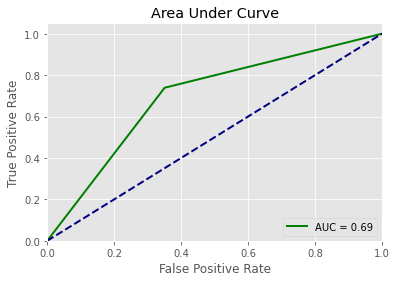

In [16]:
from func_for_model import auc_chart
auc_chart(fpr_dt, tpr_dt, roc_auc_dt)

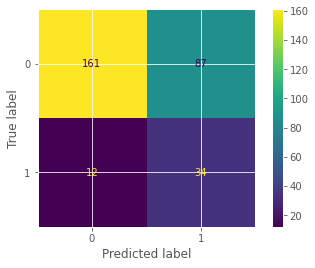

In [17]:
cm = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm).plot()
plt.show()

### precision, recall,  f1-score 

In [18]:

print("Classification Report\n", classification_report(y_test, y_pred_dt))

Classification Report
               precision    recall  f1-score   support

           0       0.93      0.65      0.76       248
           1       0.28      0.74      0.41        46

    accuracy                           0.66       294
   macro avg       0.61      0.69      0.59       294
weighted avg       0.83      0.66      0.71       294



# Random Forest

In [19]:
rf=RandomForestClassifier(criterion='gini', random_state=18, max_depth=4, min_samples_split=50,max_features="auto")
rf.fit(x_train_res,y_train_res)
model_rf_score_train = rf.score(x_train_res, y_train_res)
print("Training score: ", model_rf_score_train)
model_rf_score_test = rf.score(x_test, y_test)
print("Testing score: ", model_rf_score_test)

Training score:  0.806282722513089
Testing score:  0.7142857142857143


In [20]:
# predictions
y_pred_rf=rf.predict(x_test)

# 2.1 Perfomance Metrics
### AUC

In [21]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_rf

0.6801367461430575

### Confusion Matrix

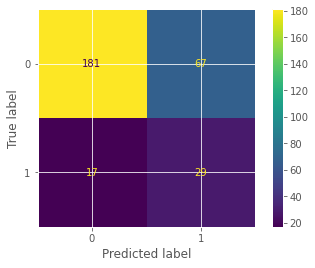

In [22]:
cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm).plot()
plt.show()

### precision, recall,  f1-score 

In [23]:
print("Classification Report\n", classification_report(y_test, y_pred_rf))

Classification Report
               precision    recall  f1-score   support

           0       0.91      0.73      0.81       248
           1       0.30      0.63      0.41        46

    accuracy                           0.71       294
   macro avg       0.61      0.68      0.61       294
weighted avg       0.82      0.71      0.75       294



# Gradient Boosting Model (GBM)

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='friedman_mse', random_state=18, max_depth=4, min_samples_split=50, max_features="auto")
gbm.fit(x_train,y_train)
model_gbm_score_train = gbm.score(x_train, y_train)
print("Training score: ", model_gbm_score_train)
model_gbm_score_test = gbm.score(x_test, y_test)
print("Testing score: ", model_gbm_score_test)

Training score:  0.9770408163265306
Testing score:  0.8775510204081632


In [25]:
# predicitons
y_pred_gbm=gbm.predict(x_test)

# 3.1 Perfomance Metrics
### AUC

In [26]:
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_pred_gbm)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)
roc_auc_gbm

0.6618162692847125

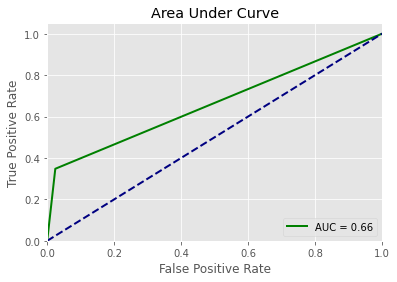

In [27]:
auc_chart(fpr_gbm, tpr_gbm, roc_auc_gbm)

### Confusion Matrix

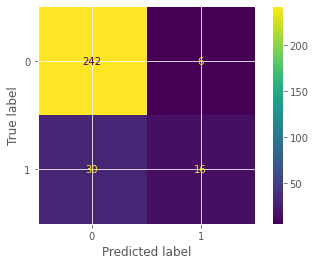

In [28]:
cm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(cm).plot()
plt.show()

### precision, recall, f1-score

In [29]:
print("Classification Report\n", classification_report(y_test, y_pred_gbm))

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       248
           1       0.73      0.35      0.47        46

    accuracy                           0.88       294
   macro avg       0.81      0.66      0.70       294
weighted avg       0.86      0.88      0.86       294



# <font color=mediumblue> Final Model Selected - GBM using Undersampling </font>
- Comparing the performance metrics of all the 3 models we see that the, GBM works better than others. Hence we use GBM, to find the top features in this dataset

## <font color=mediumblue> The important factors associated with Attrition </font>

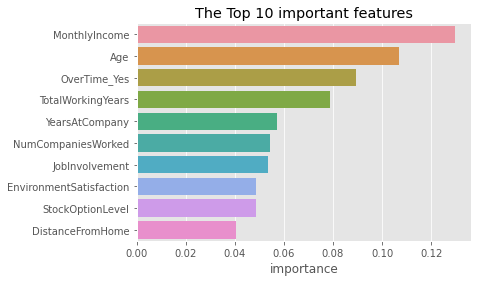

In [30]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=x_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)


ax=sns.barplot(x='importance', y=feature_importances.iloc[0:10].index,data=feature_importances.iloc[0:10])
plt.title("The Top 10 important features")
plt.show()

                                            **************************************